In [1]:
############################################## Setup and Data Preparation #######################################

import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Load your dataset
rawdata = pd.read_excel("data.xlsx", parse_dates=["t"], index_col="t")

# Generate the variable of GDP growth

# Calculate GDP growth as the percentage change in GDP
rawdata['gdpgr'] = rawdata['realgdp'].pct_change()

# Replace the first missing value (NaN) with 0
rawdata['gdpgr'].fillna(0, inplace=True)

# Ensure variables of interest are correctly defined
variables = ['gdpgr', 'infl', 'unempl','migr']
data = rawdata[variables]

# Add structural break dummies
rawdata['Break_2003'] = (rawdata.index.year >= 2003).astype(int)
rawdata['Break_2008'] = (rawdata.index.year >= 2008).astype(int)
rawdata['Break_2020'] = (rawdata.index.year >= 2020).astype(int)
rawdata['Break_2022'] = (rawdata.index.year >= 2022).astype(int)

data['Break_2003'] = (data.index.year >= 2003).astype(int)
data['Break_2008'] = (data.index.year >= 2008).astype(int)
data['Break_2020'] = (data.index.year >= 2020).astype(int)
data['Break_2022'] = (data.index.year >= 2022).astype(int)


/tmp/ipykernel_2421/589606005.py:16: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rawdata['gdpgr'] = rawdata['realgdp'].pct_change()
/tmp/ipykernel_2421/589606005.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rawdata['gdpgr'].fillna(0, inplace=True)
/tmp/ipykernel_2421/589606005.py:31: SettingWithCopyWarning: 
A value is tr

In [15]:
################################## Stationarity Testing ####################################

# ADF Test Function
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return {"ADF Statistic": result[0], "p-value": result[1]}

# Test stationarity for all variables
for var in variables:
    result = adf_test(data[var].dropna())
    print(f"{var}: {result}")


data=data.head(30)

    

gdpgr: {'ADF Statistic': np.float64(-5.191076275693809), 'p-value': np.float64(9.168494593119968e-06)}
infl: {'ADF Statistic': np.float64(-4.897151226135035), 'p-value': np.float64(3.532238457156485e-05)}
unempl: {'ADF Statistic': np.float64(-1.4331299910097108), 'p-value': np.float64(0.5662942126287479)}
migr: {'ADF Statistic': np.float64(-4.612947398619886), 'p-value': np.float64(0.0001222548927916986)}


In [16]:
################################ Making stationary ##############################

rawdata['unemplgr'] = rawdata['unempl'].pct_change()
rawdata['unemplgr'].fillna(0, inplace=True)

data['unemplgr'] = data['unempl'].pct_change()
data['unemplgr'].fillna(0, inplace=True)

statvariables=['gdpgr', 'infl', 'unemplgr','migr']

# ADF Test Function for modified variables
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return {"ADF Statistic": result[0], "p-value": result[1]}

# Test stationarity for all variables
for var in statvariables:
    result = adf_test(data[var].dropna())
    print(f"{var}: {result}")


gdpgr: {'ADF Statistic': np.float64(-4.717125243413058), 'p-value': np.float64(7.813528956858207e-05)}
infl: {'ADF Statistic': np.float64(-4.897151226135035), 'p-value': np.float64(3.532238457156485e-05)}
unemplgr: {'ADF Statistic': np.float64(-6.6946209093364555), 'p-value': np.float64(4.028784653289028e-09)}
migr: {'ADF Statistic': np.float64(-4.612947398619886), 'p-value': np.float64(0.0001222548927916986)}


/tmp/ipykernel_2421/1336282389.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rawdata['unemplgr'] = rawdata['unempl'].pct_change()
/tmp/ipykernel_2421/1336282389.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rawdata['unemplgr'].fillna(0, inplace=True)
/tmp/ipykernel_2421/1336282389.py:6: SettingWithCopyWarning: 
A value 

In [17]:
########################################## Optimal number of lags ###########################################3

from statsmodels.tsa.api import VAR

# Fit the VAR model and determine the optimal lag
model = VAR(data)  
lag_selection = model.select_order(maxlags=2)
print(lag_selection.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       5.720       6.148       305.1       5.851
1      -4.817     -0.5347     0.01088      -3.508
2     -68.50*     -60.36*  2.559e-29*     -66.01*
-------------------------------------------------


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Dec, 2024
Time:                     18:14:40
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                  -0.661610
Nobs:                     29.0000    HQIC:                  -3.57598
Log likelihood:          -209.221    FPE:                 0.00966027
AIC:                     -4.90494    Det(Omega_mle):     0.000671413
--------------------------------------------------------------------
Results for equation gdpgr
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.000533         0.044742           -0.012           0.991
L1.gdpgr             -0.060155         0.217604           -0.276           0.782
L1.infl              -0.002550         0.002176           -1

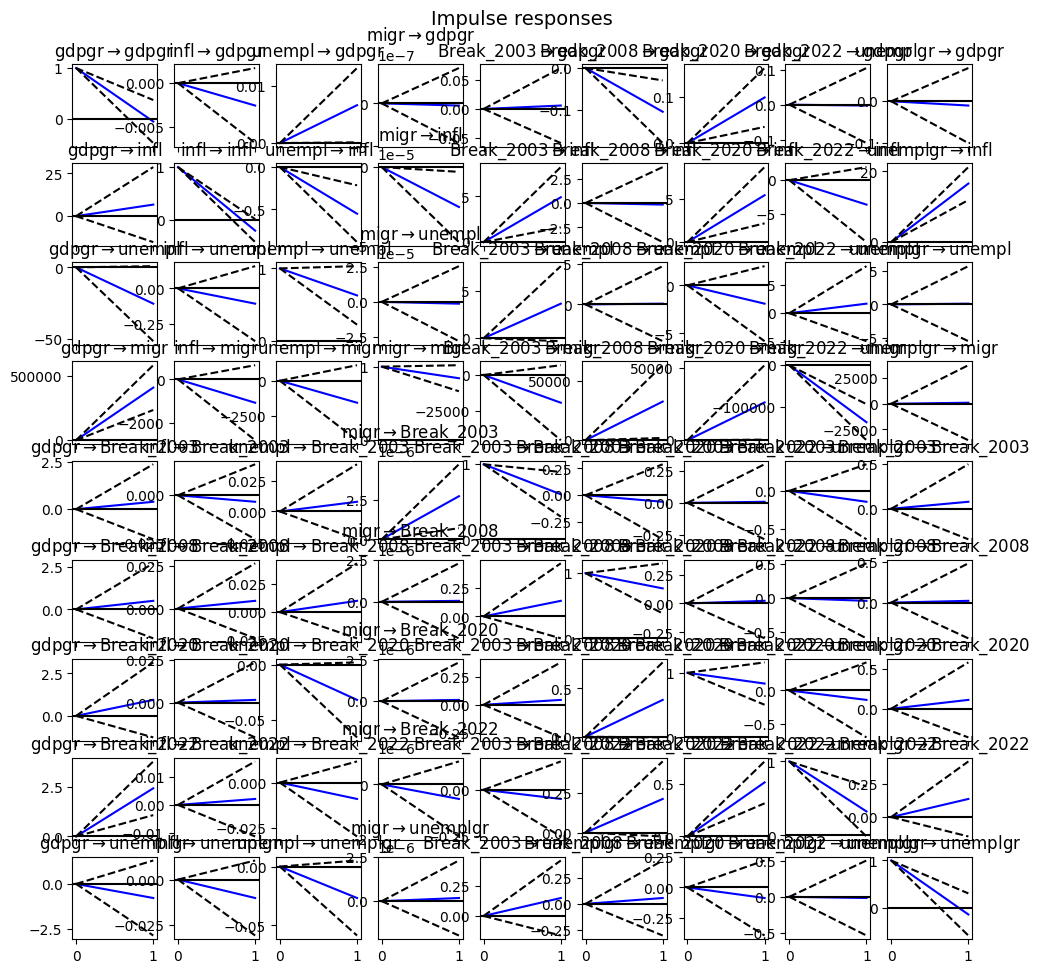

In [18]:
##################################### Impulse response functions and structural break analysis ######################

# Compute the impulse response functions
fitted_model = model.fit(1)
irf = fitted_model.irf(1)  # Specify the number of periods for the IRF
irf.plot(orth=False)

# Analyze structural breaks by including dummies as exogenous variables
exog_data = data[['Break_2003', 'Break_2008', 'Break_2020', 'Break_2022']]
var_with_exog = model.fit(1, exog_data.iloc[1:])
print(var_with_exog.summary())

In [19]:
################################# Incorporating IV ##########################

from statsmodels.sandbox.regression.gmm import IV2SLS

# Assuming 'GDP_similar' is your IV dataset
iv_data = pd.read_csv("iv_data.csv", parse_dates=["Year"], index_col="Year")

# Merge IV with endogenous variables
merged_data = pd.concat([data, iv_data], axis=1).dropna()

# Perform IV regression for GDP growth
iv_model = IV2SLS(
    merged_data['GDP_growth'], 
    merged_data[['Inflation_rate', 'Unemployment']],  # endogenous regressors
    merged_data[['GDP_similar1', 'GDP_similar2']]    # instruments
)
iv_results = iv_model.fit()
print(iv_results.summary)

FileNotFoundError: [Errno 2] No such file or directory: 'iv_data.csv'

In [ ]:
################################### Robustness Check ######################################

# Subsample analysis (e.g., pre-2022 and post-2022)
pre_2022 = data[data.index.year < 2022]
post_2022 = data[data.index.year >= 2022]

# Fit separate VAR models for each sample
var_pre = VAR(pre_2022.diff().dropna()).fit(optimal_lag)
var_post = VAR(post_2022.diff().dropna()).fit(optimal_lag)

# Compare impulse responses
irf_pre = var_pre.irf(10)
irf_post = var_post.irf(10)

irf_pre.plot(orth=False, title="Pre-2022 IRF")
irf_post.plot(orth=False, title="Post-2022 IRF")
plt.show()